In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
%matplotlib inline 
# inline is to display inside notebook

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

 # for chart to look sharp
%config InlineBackend.figure_format = 'retina'
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("HR_dataset_DS360.csv")


In [ ]:
df.sample(10)

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
10234,Robert Marsha,0.61,0.74,3,160,3,0,0,0,marketing,medium
14784,Jodie Smith,0.36,0.47,2,148,3,0,1,0,technical,medium
7853,Troy Vann,0.86,0.64,4,147,2,1,0,0,product_mng,high
5493,Scott Martinez,0.89,0.39,6,190,3,1,0,0,RandD,medium
593,Leona Littlefield,0.37,0.54,2,132,3,0,1,0,technical,low
11783,Keri Miner,0.66,0.79,5,134,3,0,0,0,management,high
13301,Victor Howell,0.87,0.52,4,140,3,0,0,0,product_mng,medium
9797,Eva Thomas,0.69,0.77,3,232,2,0,0,0,sales,low
1137,Jeff Schwartz,0.87,0.88,5,262,6,0,1,0,sales,low
6530,Joyce Glasby,0.97,0.72,5,260,4,0,0,0,technical,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   names                  15000 non-null  object 
 1   satisfaction_level     15000 non-null  float64
 2   last_evaluation        15000 non-null  float64
 3   number_project         15000 non-null  int64  
 4   average_monthly_hours  15000 non-null  int64  
 5   exp_in_company         15000 non-null  int64  
 6   work_accident          15000 non-null  int64  
 7   left                   15000 non-null  int64  
 8   promotion_last_5years  15000 non-null  int64  
 9   role                   15000 non-null  object 
 10  salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [ ]:
avges_role = df.groupby(["role"]).agg(
    Average_Attrition = ("left", 'mean'),
    Average_Monthly_Hours = ("average_monthly_hours", 'mean'),
    Average_Number_Projects = ("number_project", 'mean'),
    Average_Exp_In_Company = ("exp_in_company", 'mean'),
    Average_Satisfaction = ("satisfaction_level", 'mean')
    ).round(4)
avges_role = avges_role.reset_index()
avges_role

,role,Average_Attrition,Average_Monthly_Hours,Average_Number_Projects,Average_Exp_In_Company,Average_Satisfaction
0,IT,0.2225,202.2160,3.8166,3.4686,0.6181
1,RandD,0.1537,200.8005,3.8539,3.3672,0.6198
2,accounting,0.2660,201.1630,3.8253,3.5228,0.5822
3,hr,0.2909,198.6847,3.6549,3.3559,0.5988
4,management,0.1444,201.2492,3.8603,4.3032,0.6213
5,marketing,0.2366,199.3858,3.6876,3.5699,0.6186
6,product_mng,0.2195,199.9656,3.8071,3.4756,0.6196
7,sales,0.2449,200.9114,3.7763,3.5341,0.6144
8,support,0.2490,200.7582,3.8039,3.3930,0.6183
9,technical,0.2565,202.5083,3.8784,3.4120,0.6080


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


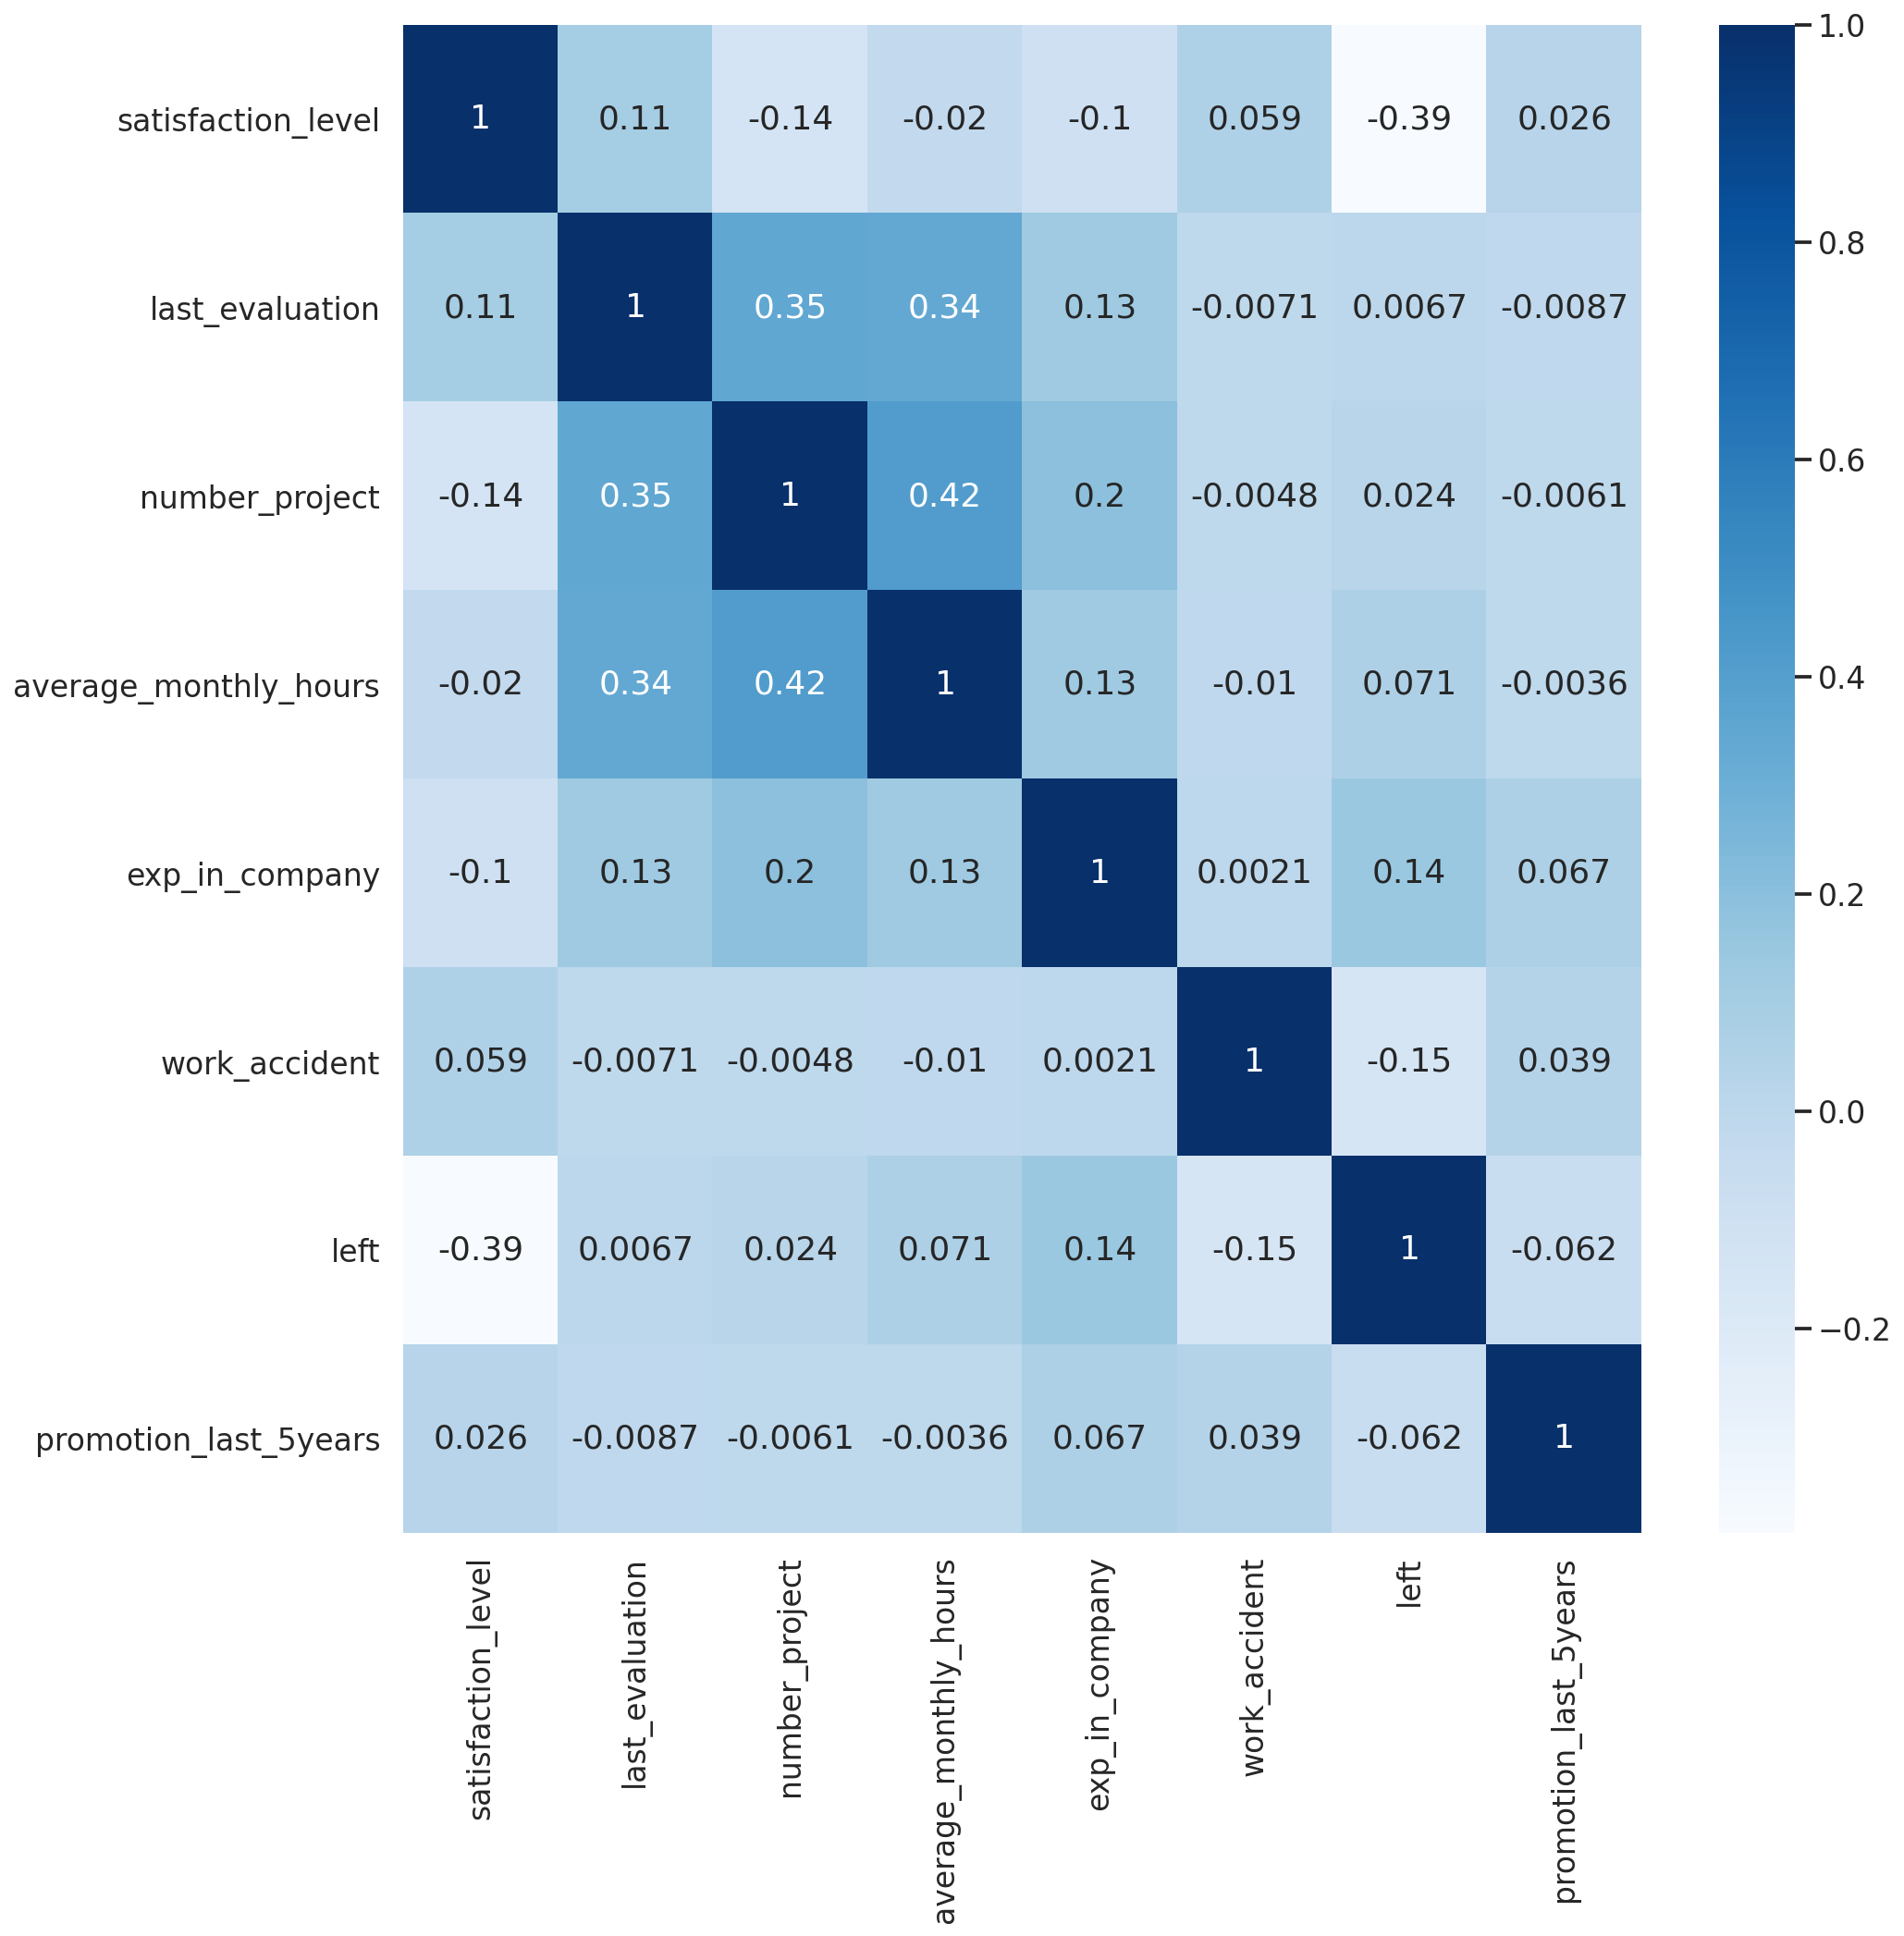

In [ ]:
sns.set(rc = {"figure.figsize": (15,15)})
sns.set_context("talk", font_scale=1)

sns.heatmap(df.corr(), cmap = "Blues", annot = True)

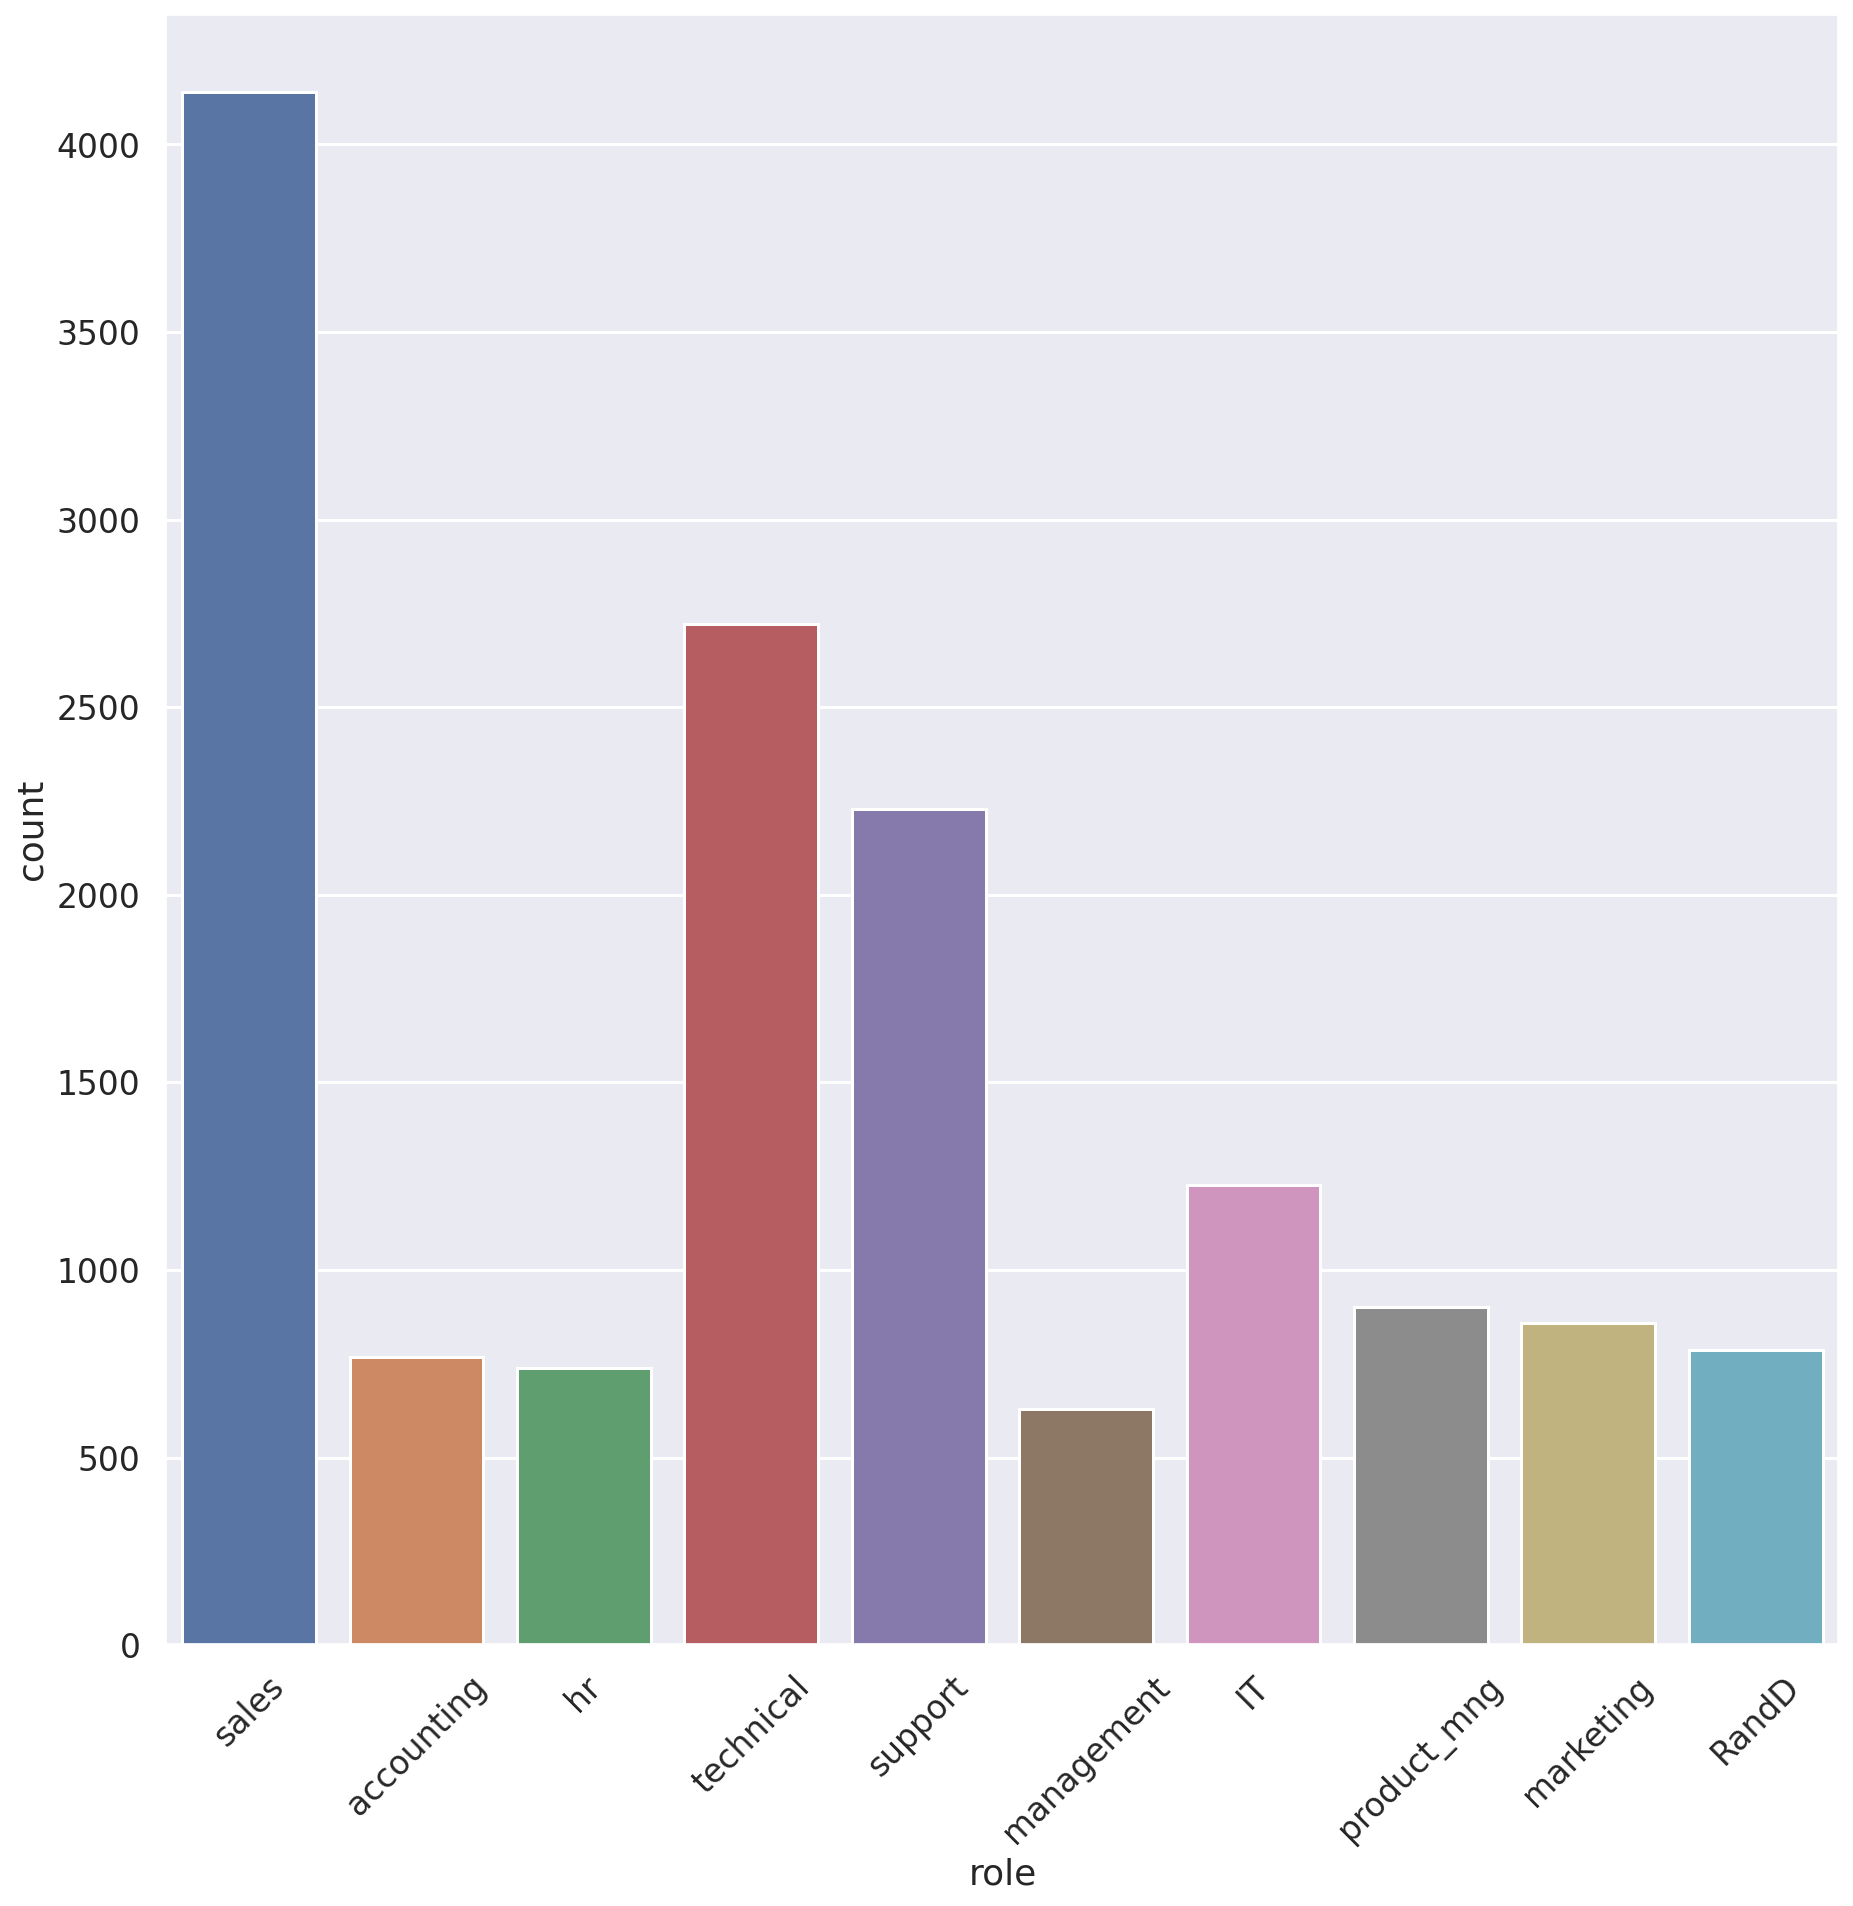

In [ ]:
ax = sns.countplot(df['role'])

loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45);

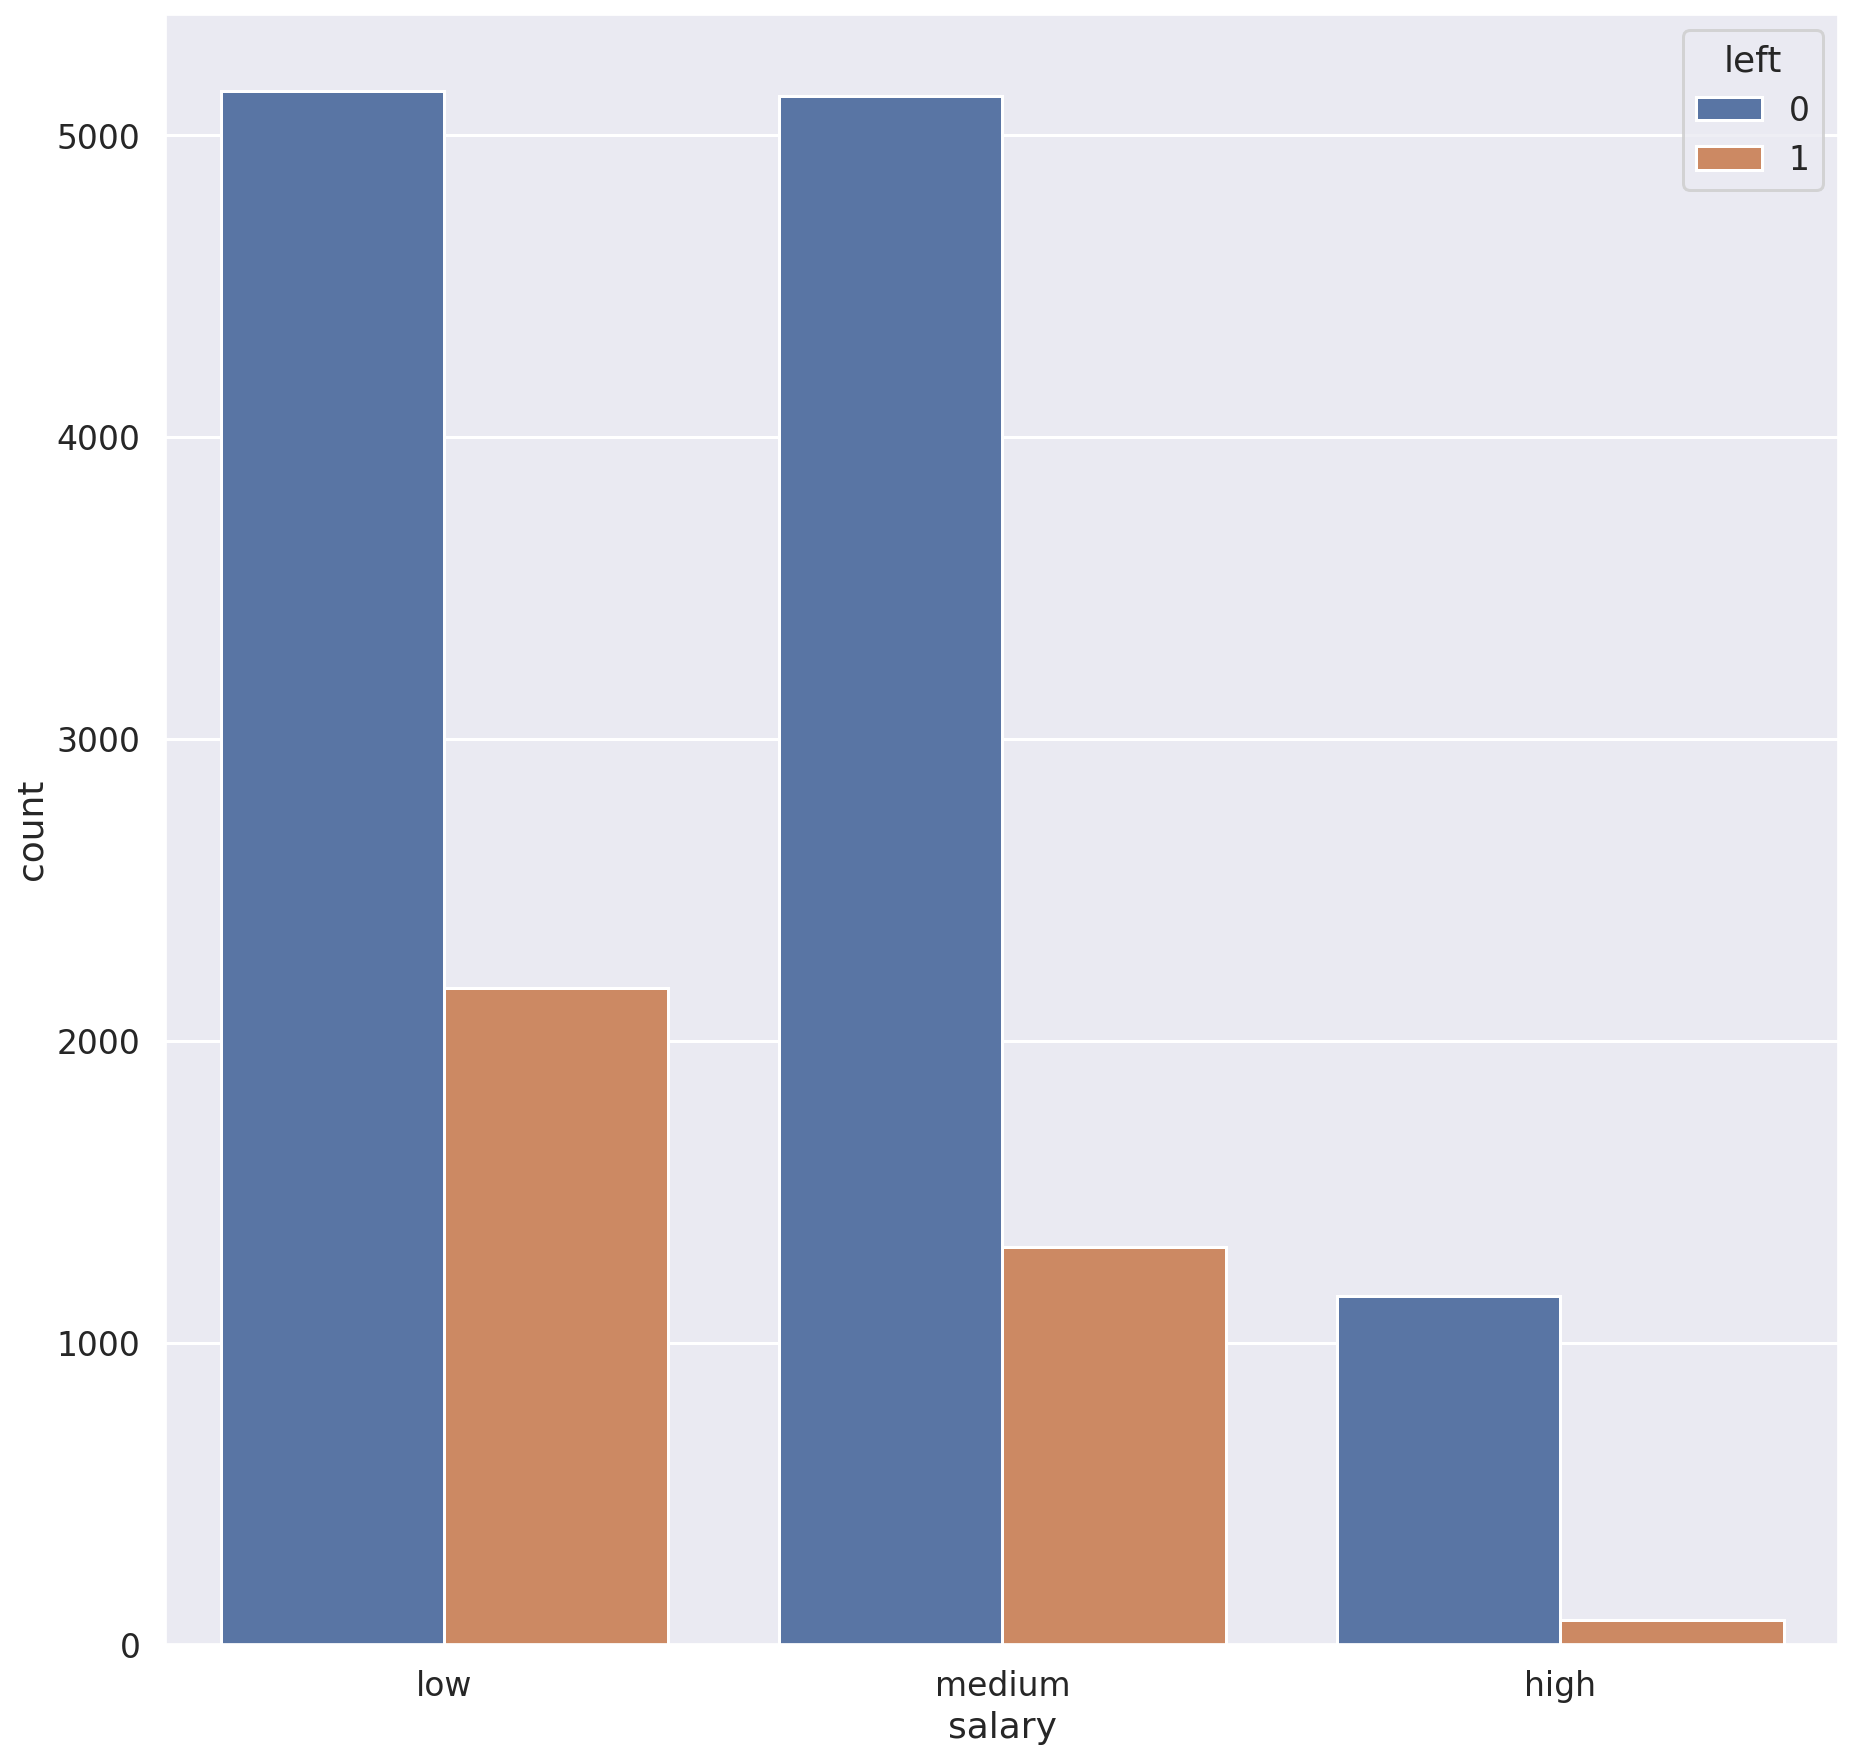

In [ ]:
sns.countplot(x = "salary", hue = "left", data = df);

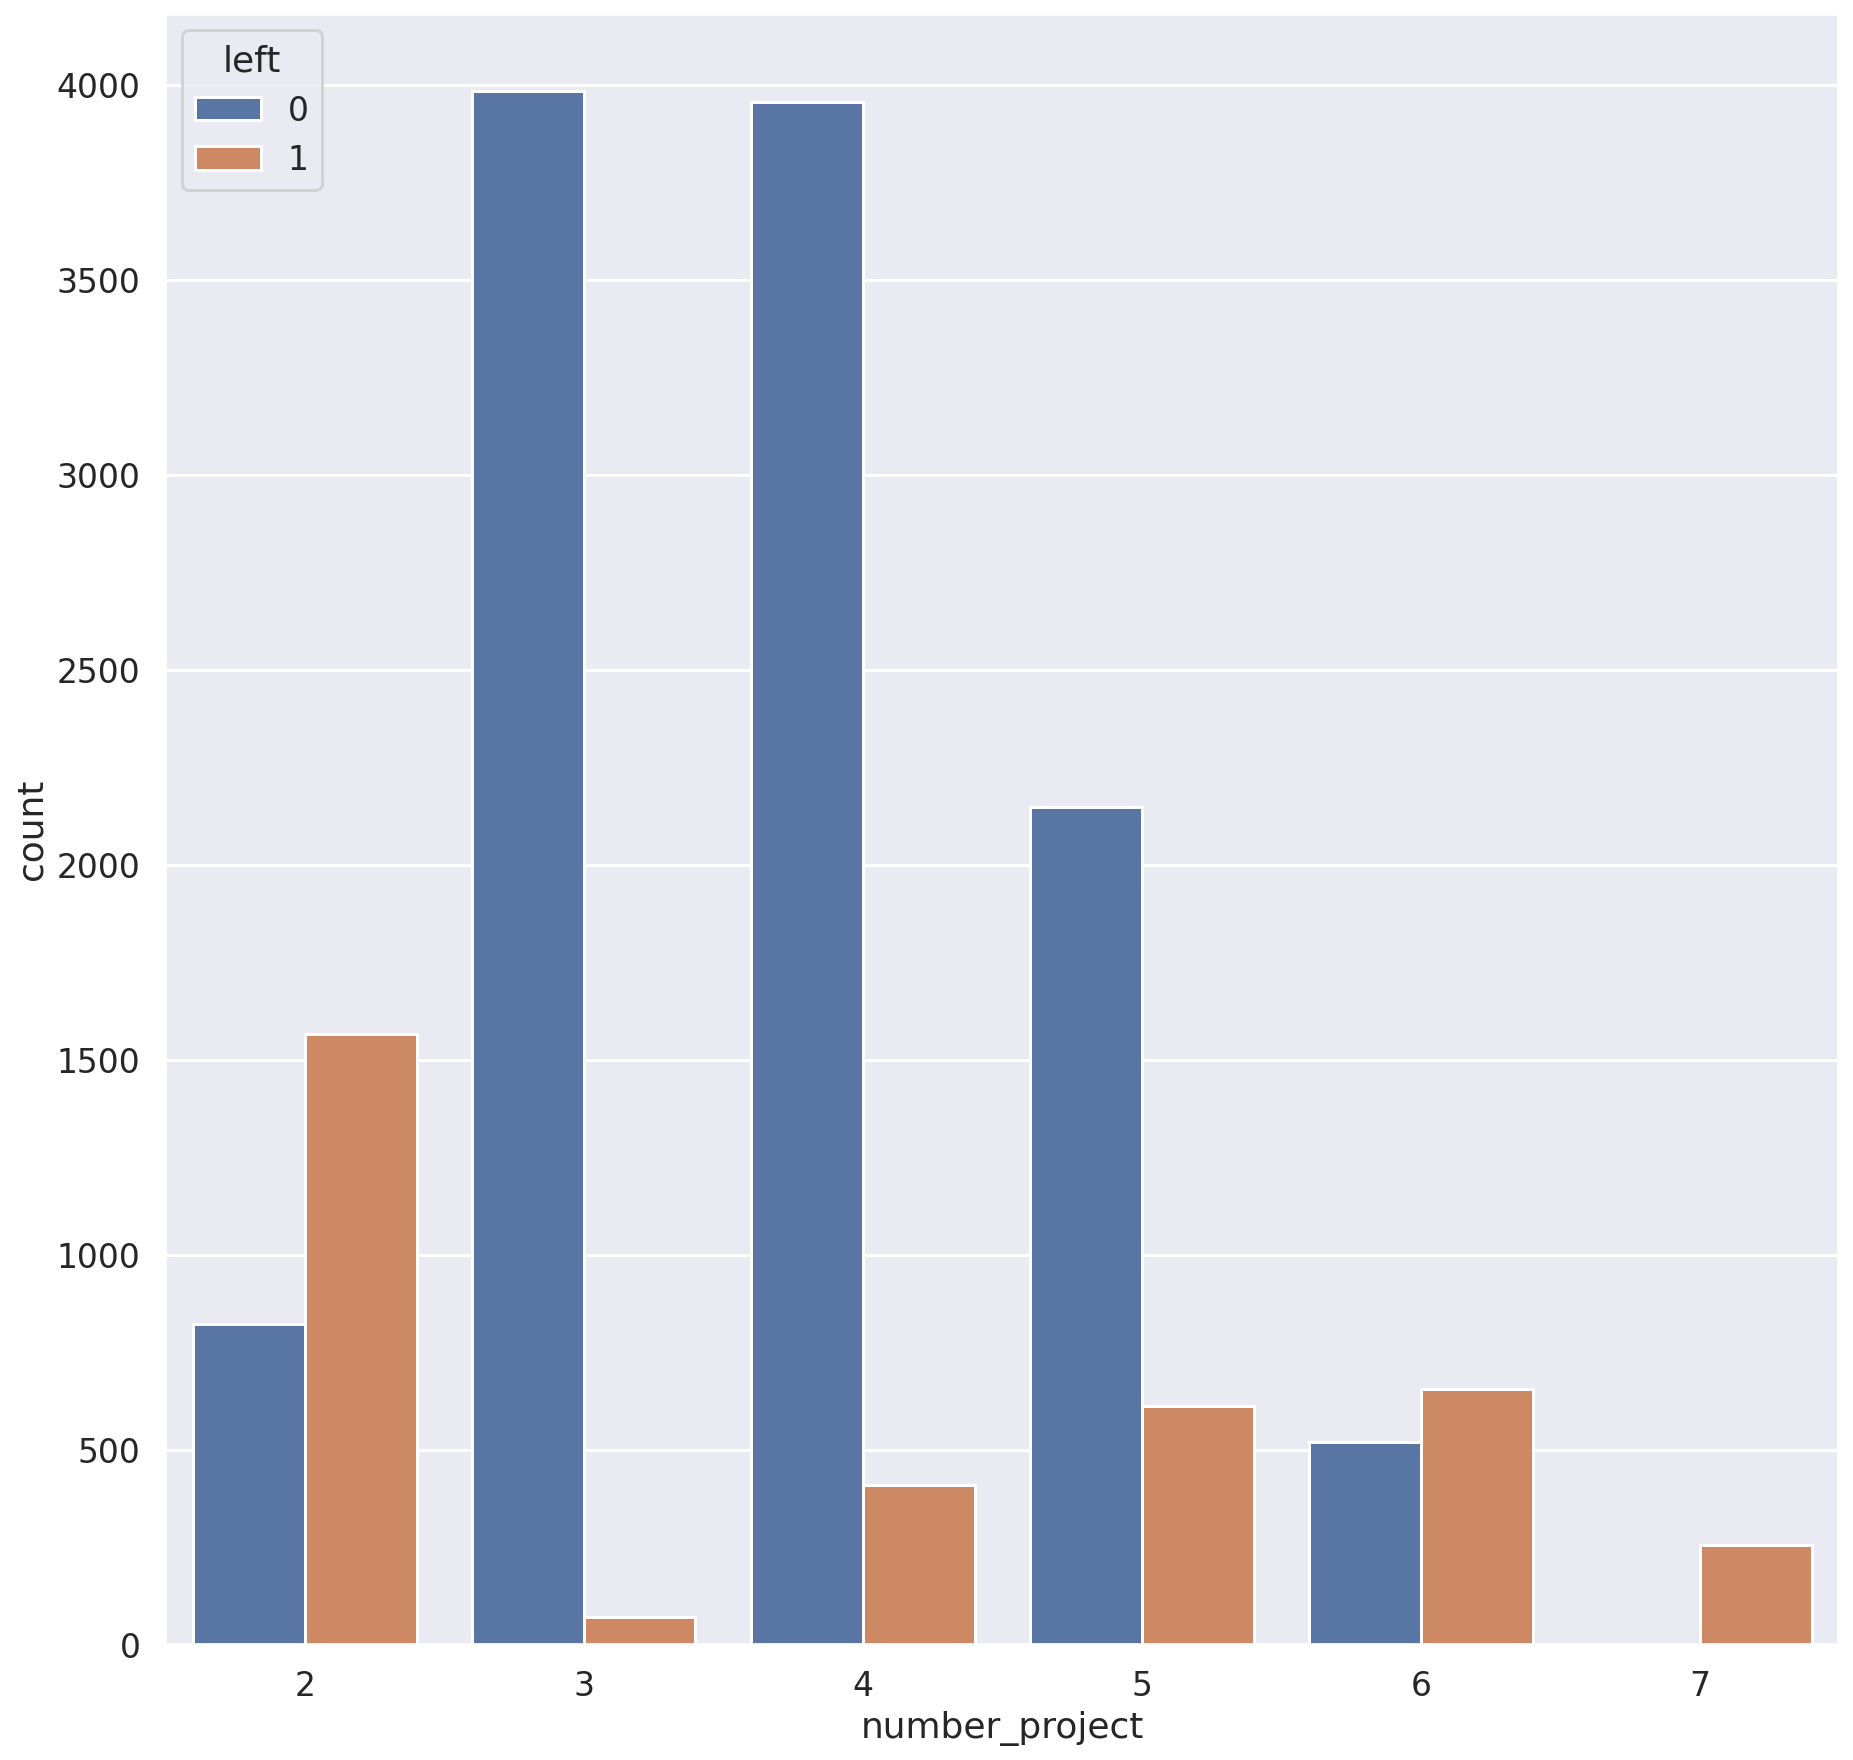

In [ ]:
ax2 = sns.countplot(x = "number_project", hue = "left", data = df);

loc, labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=0);

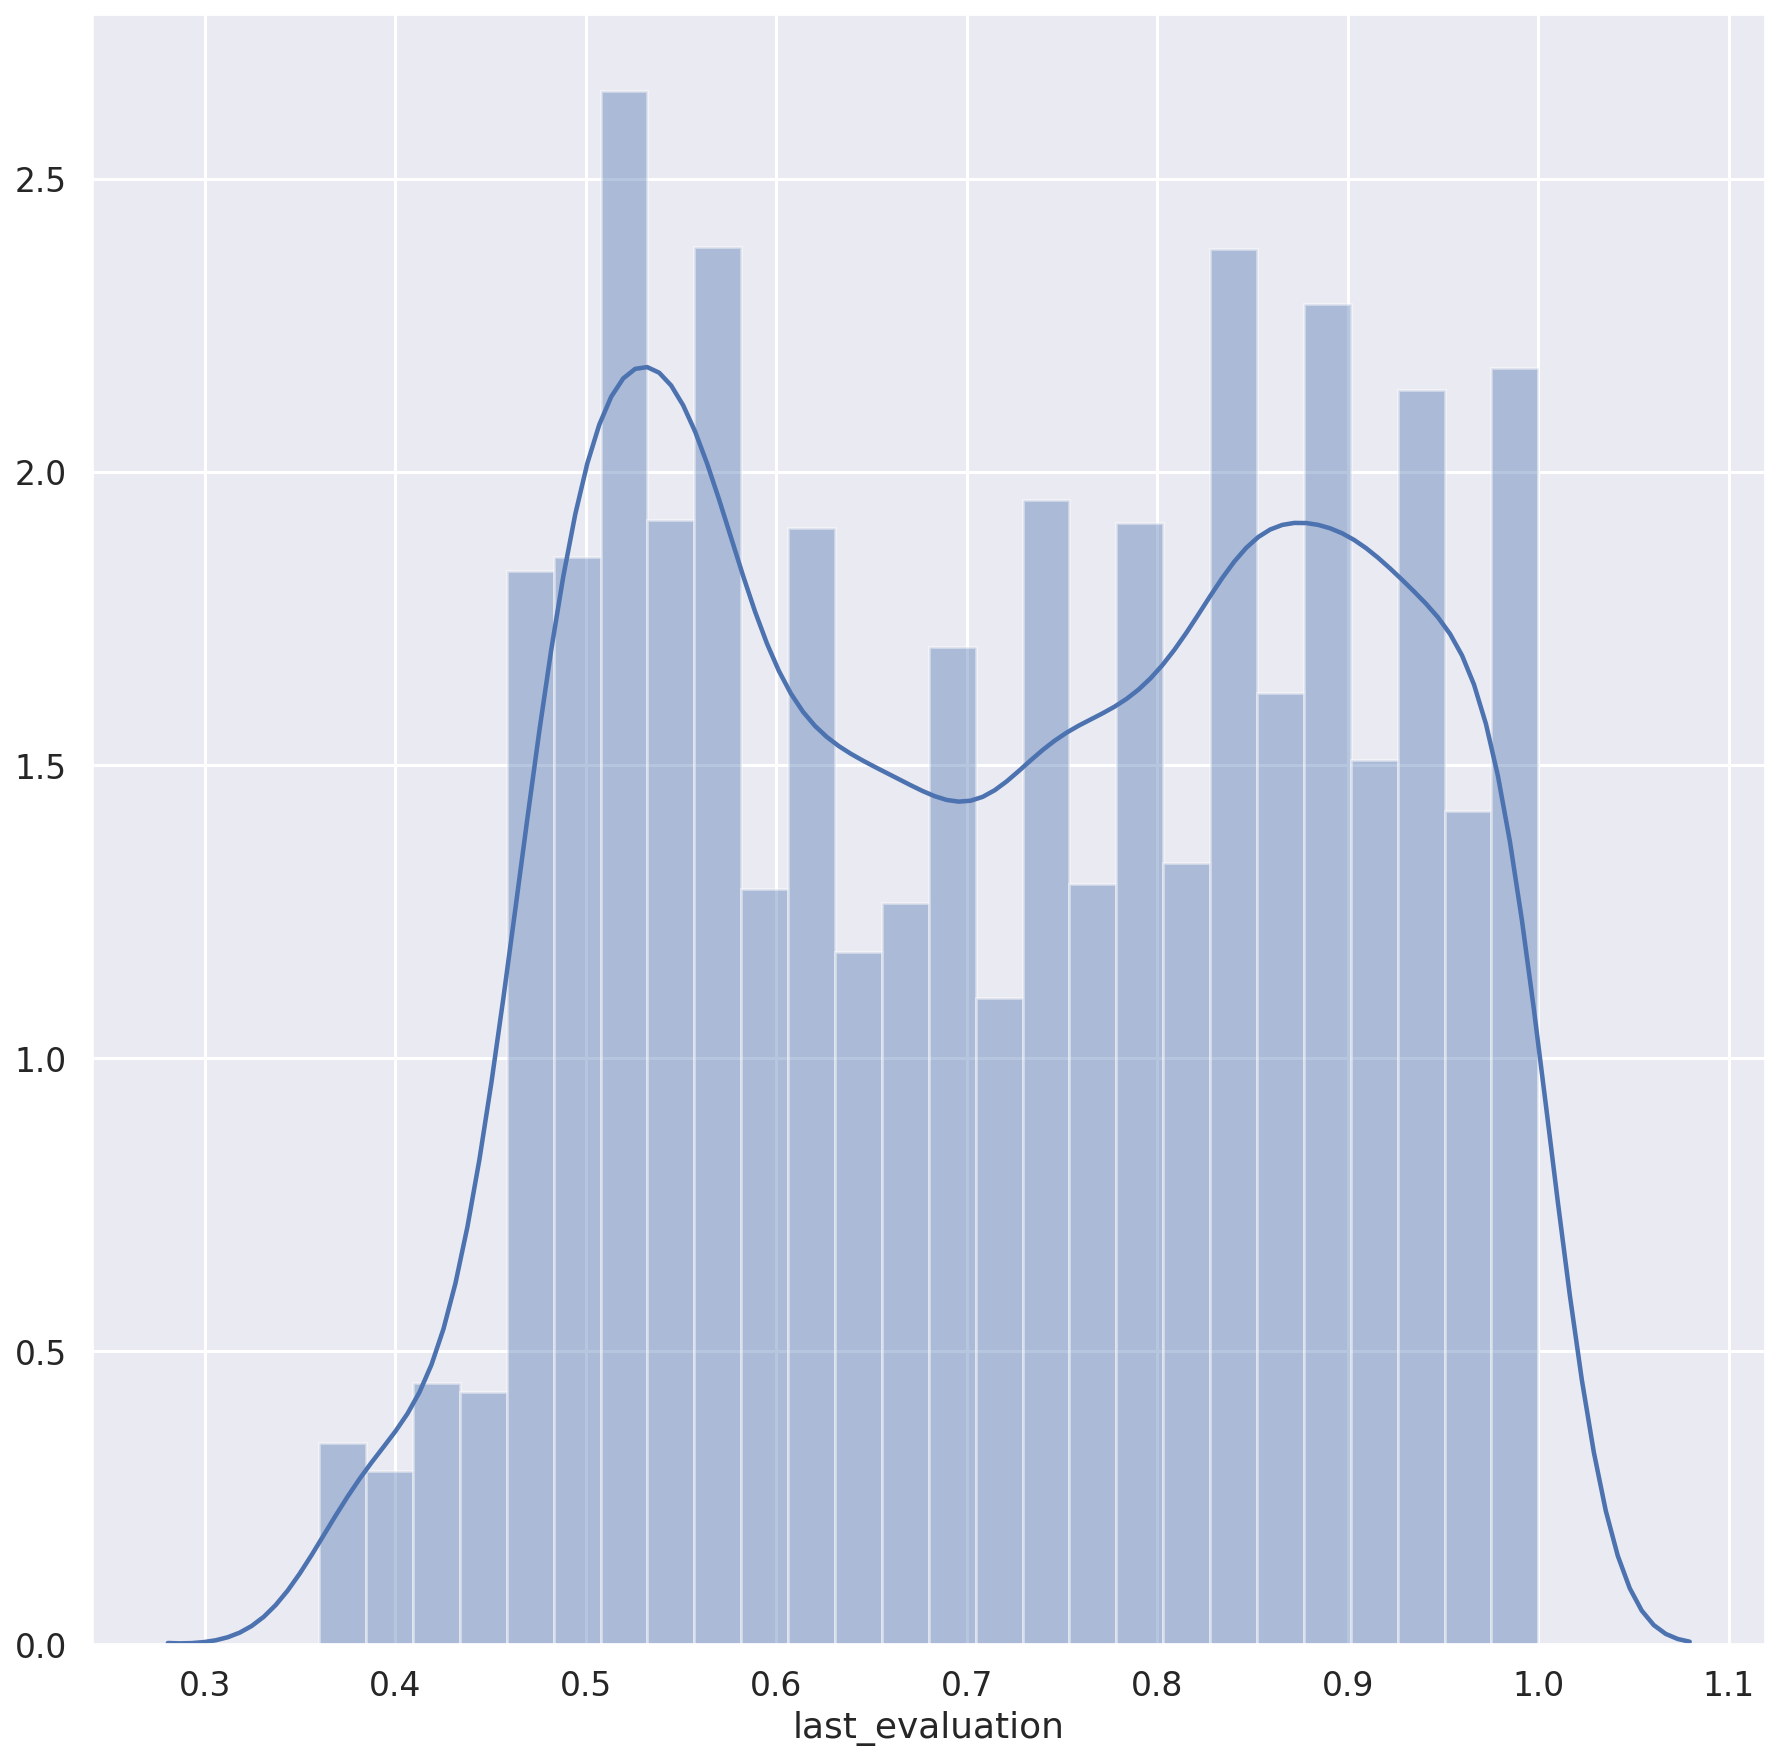

In [ ]:
sns.distplot(df["last_evaluation"], kde=True);

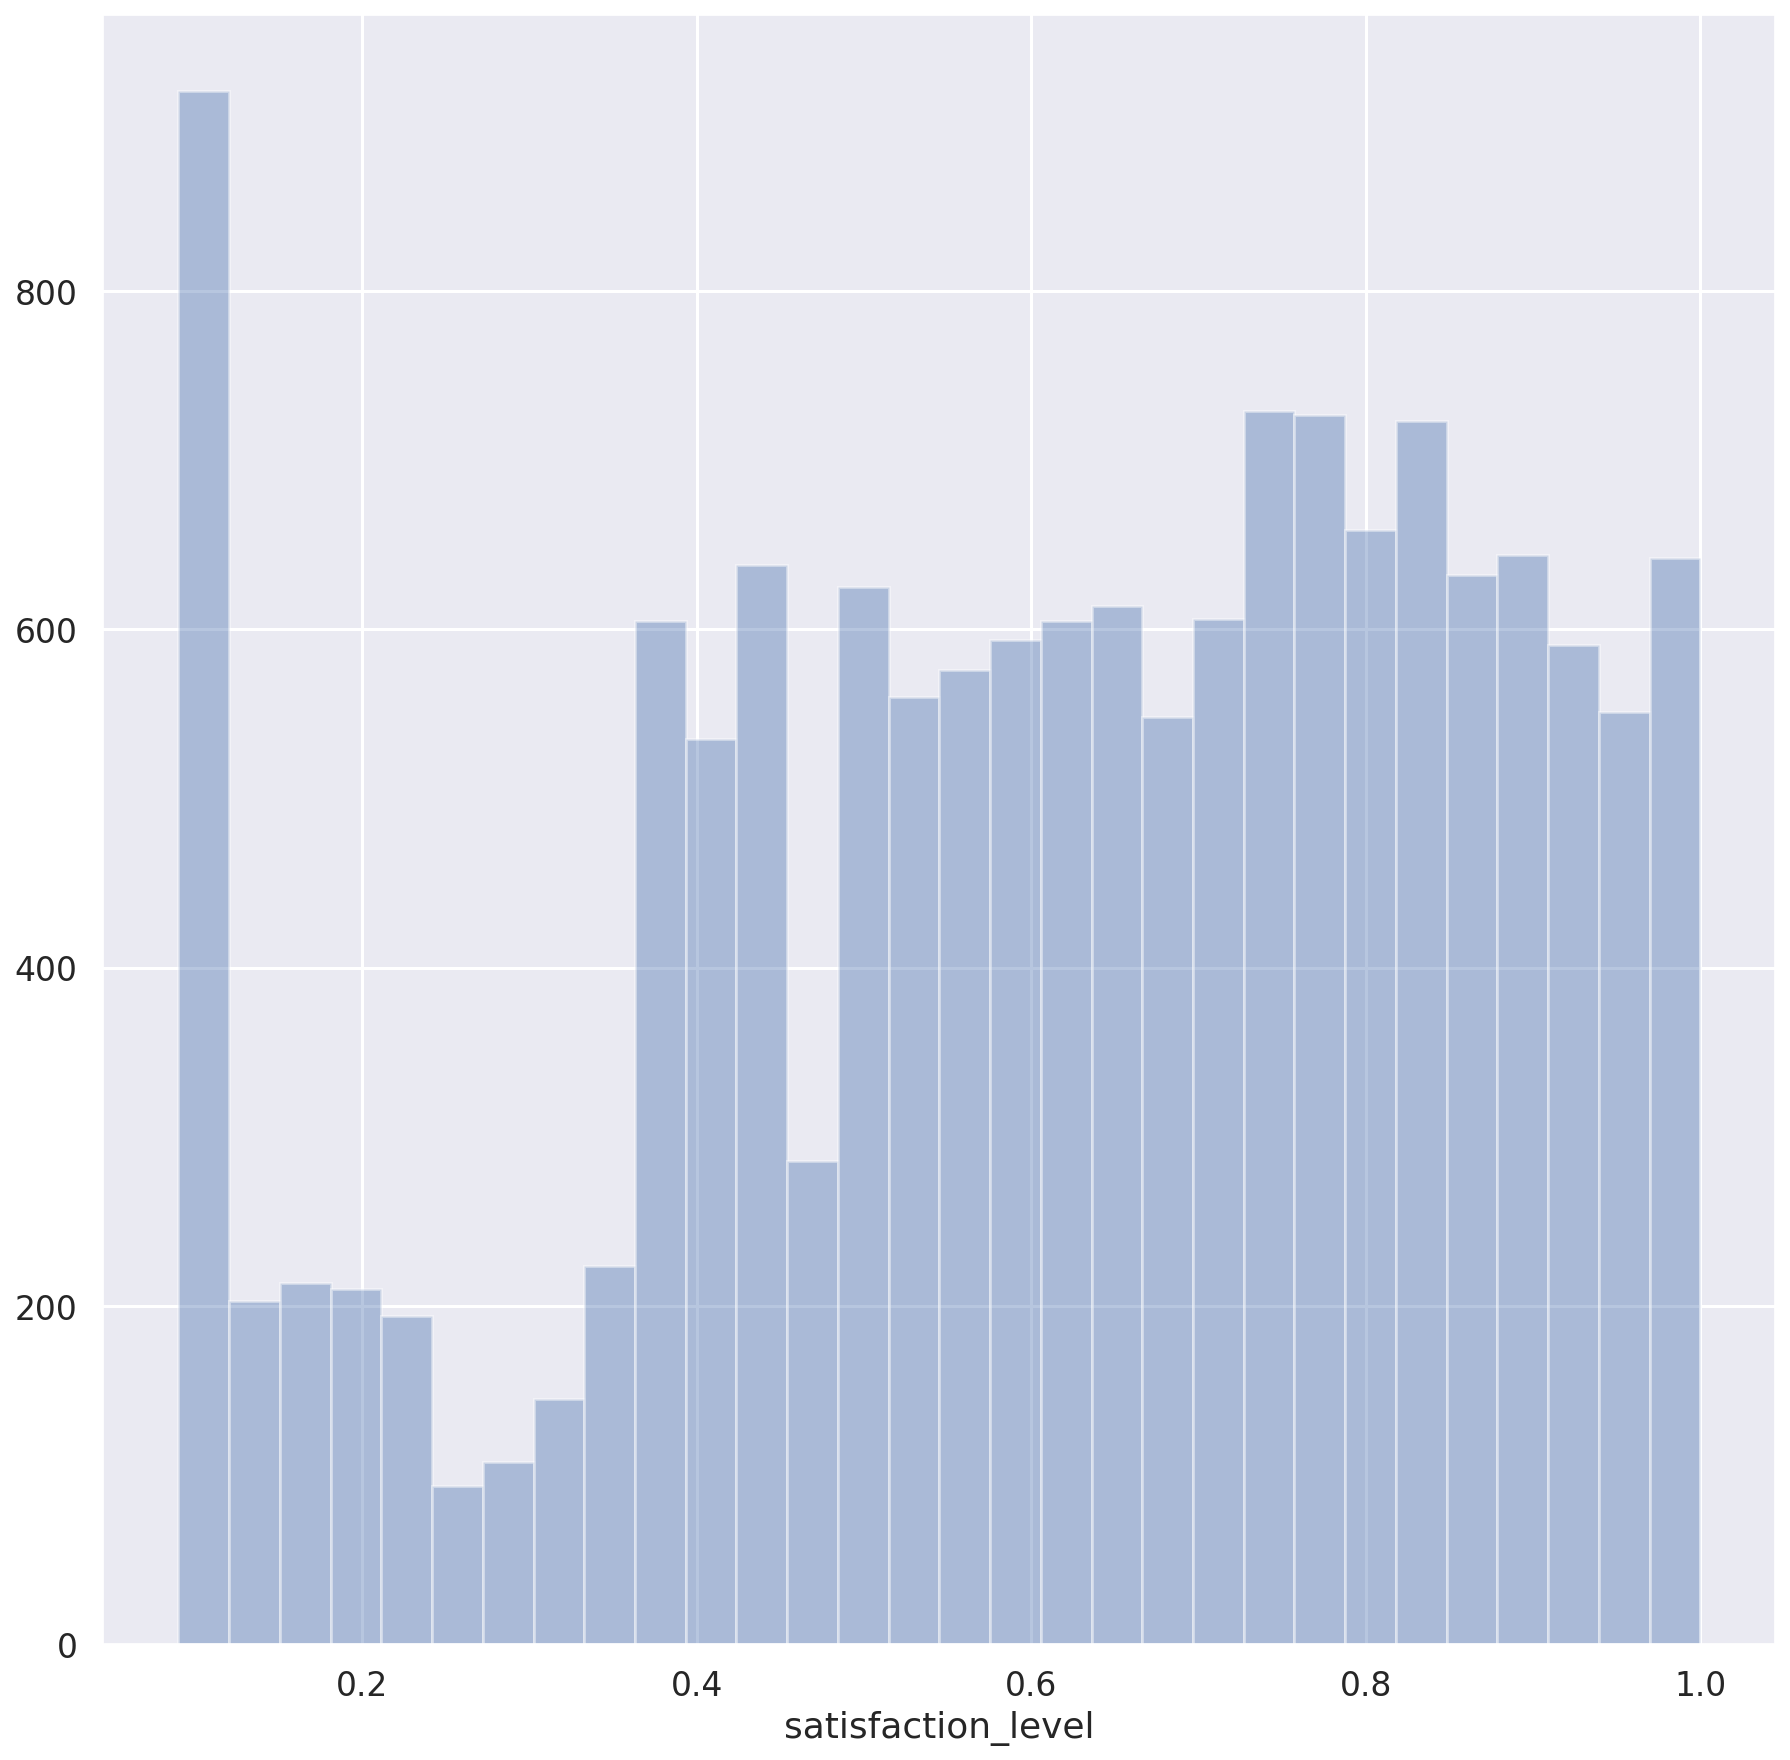

In [ ]:
sns.distplot(df["satisfaction_level"], kde=False);

In [ ]:
# input = X (capital cause it's multiple columns), output/target = y 
from sklearn.linear_model import LogisticRegression

# set columns needed
columns = ['satisfaction_level','number_project']

# Establishing the base dataset
X = df[columns]
y = df['left']

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = logmodel.predict(X)
accuracy_score(y, predictions)

0.7736

In [ ]:
predict = pd.read_csv("hr_predict.csv")
X_predict = predict[columns]

predictions = logmodel.predict(X_predict)
predict['left_predict'] = predictions

predict

,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,left_predict
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,0
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,0
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,0
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,0
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12162,Robert Davis,0.45,0.51,2,147,3,0,0,sales,low,0
96,14646,Kevin Reid,0.41,0.47,2,135,3,0,0,support,low,0
97,10385,Mary Valdez,0.99,0.50,4,173,3,0,0,management,low,0
98,9524,William Jaeger,0.74,0.55,5,168,4,0,0,management,low,0


In [ ]:
predict.to_csv("final_prediction.csv")

In [ ]:
df2 = pd.read_csv("final_prediction.csv")

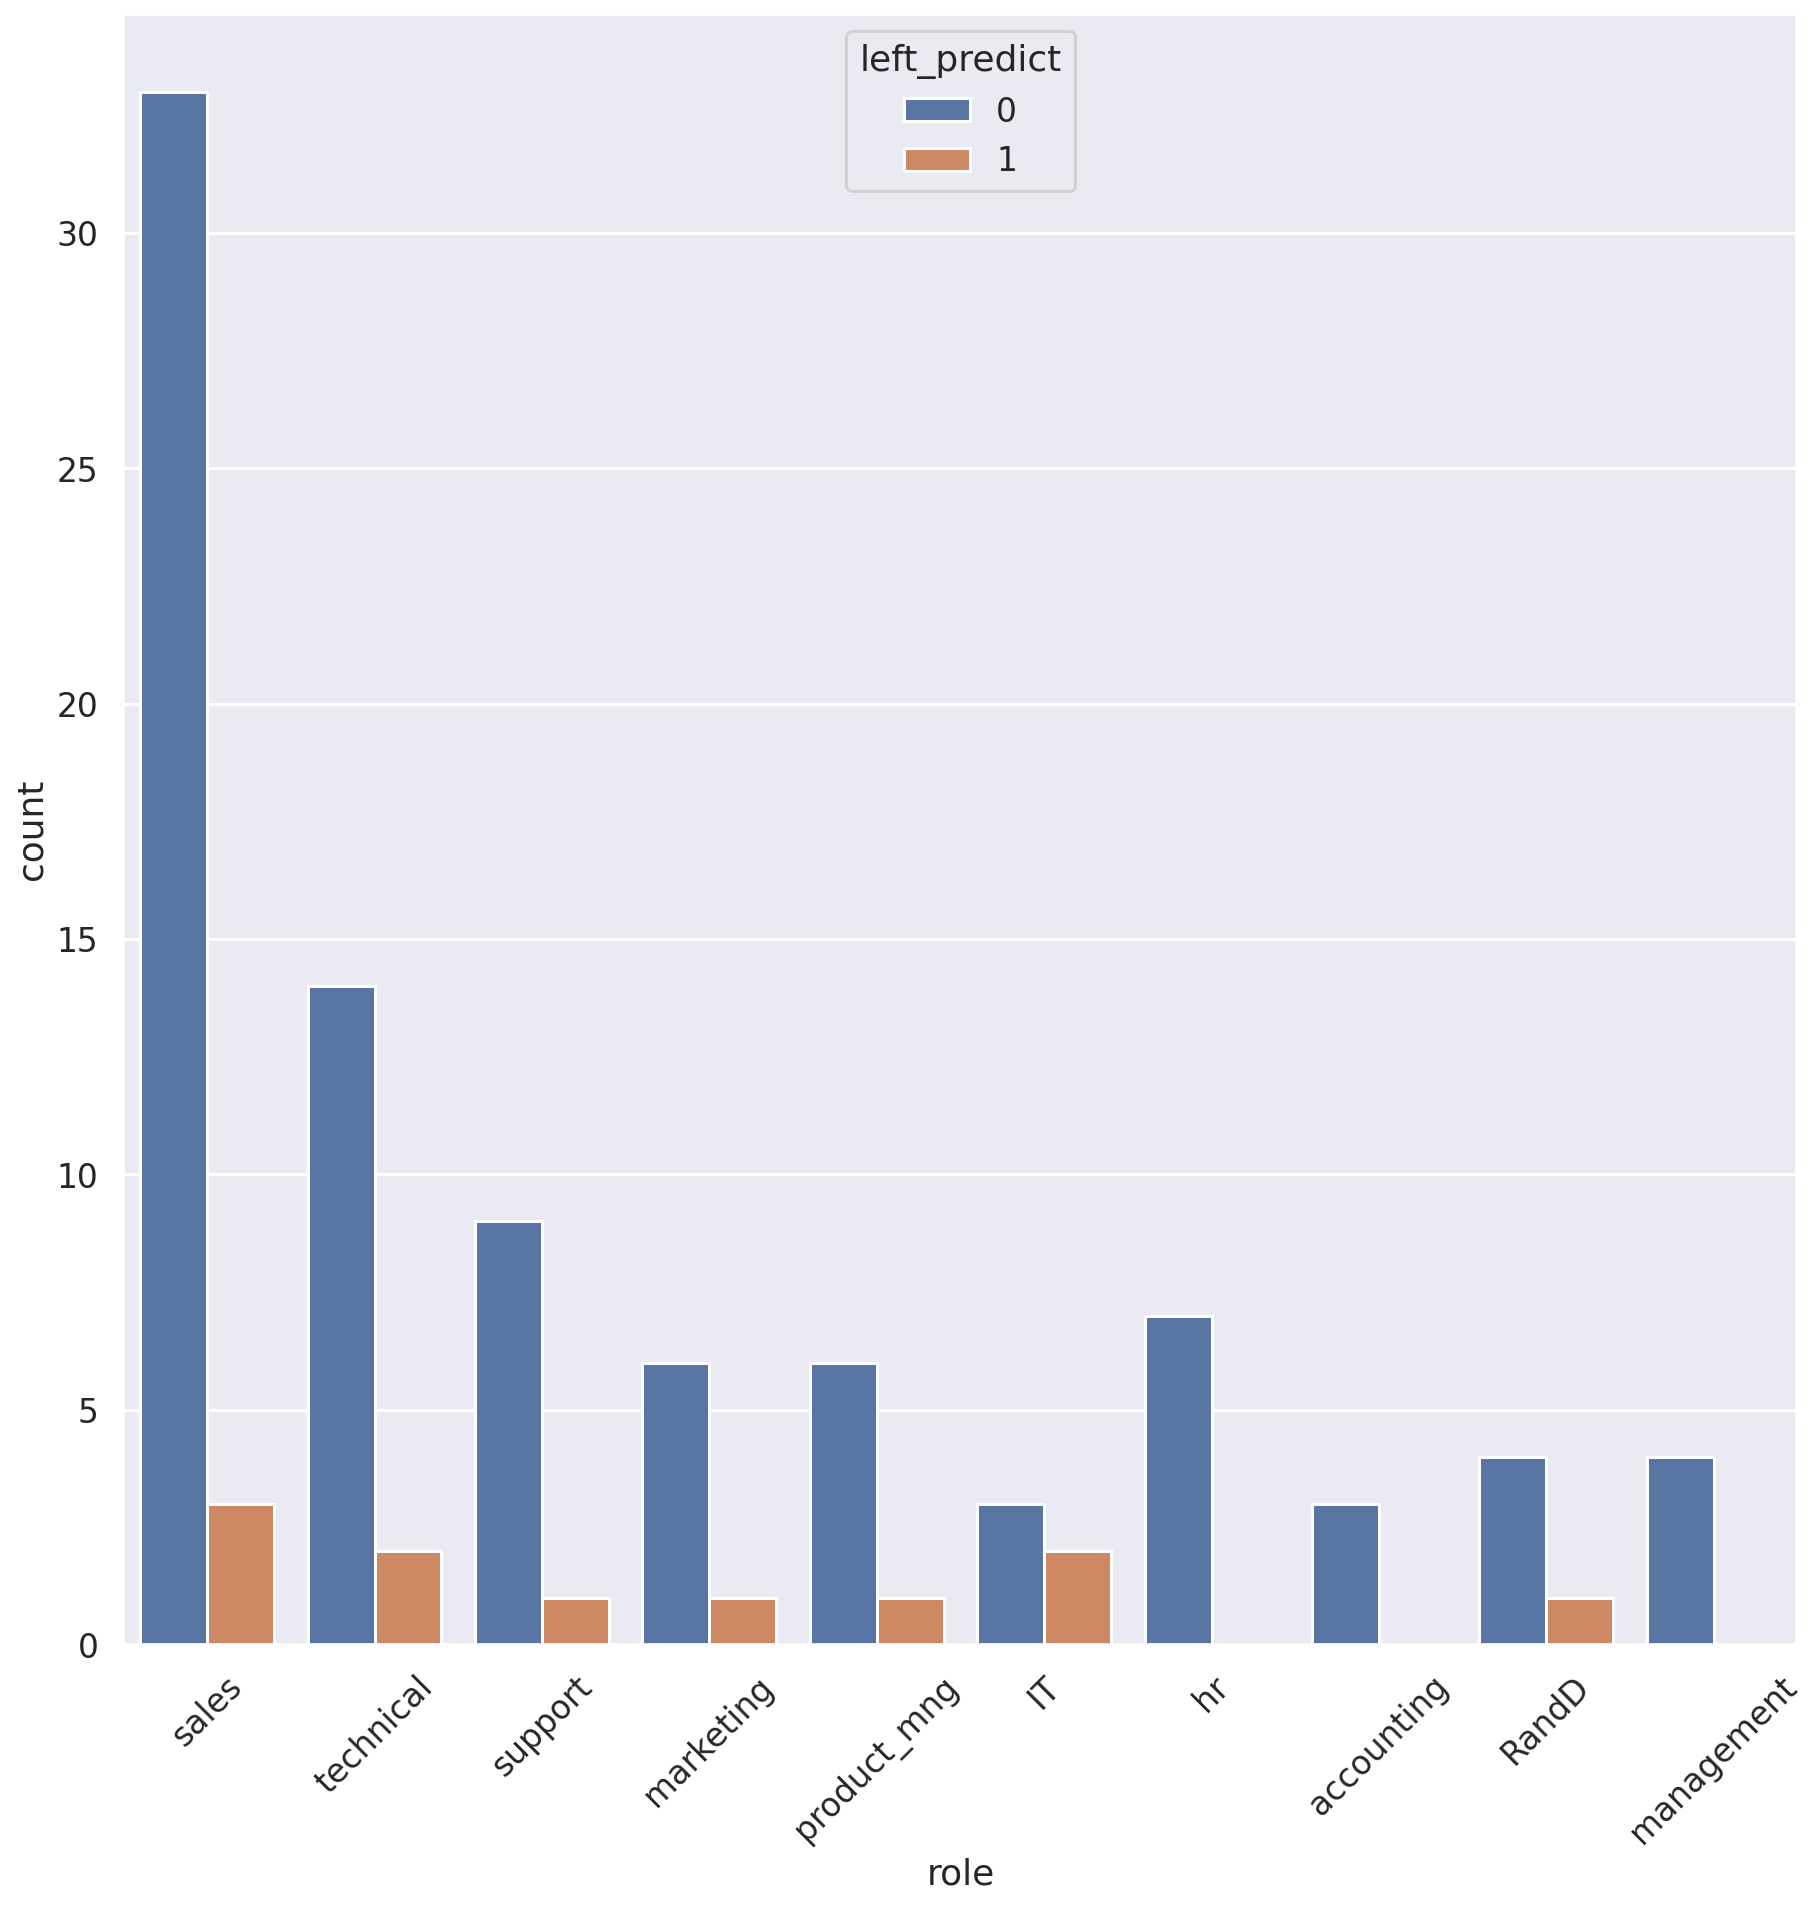

In [ ]:
ax2 = sns.countplot(x = "role", hue = "left_predict", data = df2)

loc, labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=45);

In [ ]:
df2.describe()

,Unnamed: 0,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,left_predict
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,7401.390000,0.643100,0.721300,3.860000,204.940000,3.580000,0.180000,0.020000,0.110000
std,29.011492,4504.414344,0.256045,0.179487,1.295057,48.062001,1.224167,0.386123,0.140705,0.314466
min,0.000000,23.000000,0.090000,0.380000,2.000000,106.000000,2.000000,0.000000,0.000000,0.000000
25%,24.750000,3291.750000,0.467500,0.550000,3.000000,162.250000,3.000000,0.000000,0.000000,0.000000
50%,49.500000,7124.000000,0.665000,0.720000,4.000000,207.000000,3.000000,0.000000,0.000000,0.000000
75%,74.250000,11924.000000,0.852500,0.880000,5.000000,243.750000,4.000000,0.000000,0.000000,0.000000
max,99.000000,14891.000000,1.000000,1.000000,7.000000,307.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
avges_role = df2.groupby(["role"]).agg(
    Average_Attrition = ("left_predict", 'mean'),
    Average_Monthly_Hours = ("average_monthly_hours", 'mean'),
    Average_Number_Projects = ("number_project", 'mean'),
    Average_Exp_In_Company = ("exp_in_company", 'mean'),
    Average_Satisfaction = ("satisfaction_level", 'mean')
    ).round(2)
avges_role = avges_role.reset_index()
avges_role

,role,Average_Attrition,Average_Monthly_Hours,Average_Number_Projects,Average_Exp_In_Company,Average_Satisfaction
0,IT,0.40,242.60,5.00,3.20,0.44
1,RandD,0.20,177.20,3.60,3.40,0.45
2,accounting,0.00,213.67,4.33,4.00,0.60
3,hr,0.00,200.29,3.14,3.57,0.78
4,management,0.00,166.50,3.50,3.25,0.71
5,marketing,0.14,199.57,3.71,3.00,0.60
6,product_mng,0.14,181.43,4.00,2.86,0.55
7,sales,0.08,206.25,3.75,3.97,0.70
8,support,0.10,202.60,3.70,3.60,0.58
9,technical,0.12,223.00,4.25,3.44,0.68
